# Importing packages

In [3]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.1"
Warning message:
"package 'e1071' was built under R version 4.1.1"
Warning message:
"package 'Augmen

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

# Decision Trees for all people

## Output variable: Practice of exercise During

In [4]:
table(pa_dataset[, "PA_practice_during"])


dont_practice      practice 
          346           896 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Creating the dataset partition

In [5]:
set.seed(2)
lista_treino <- createDataPartition(pa_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- pa_dataset[lista_treino,]
teste <- pa_dataset[-lista_treino,]

### Applying augmentation into the training set

In [6]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(pa_dataset))
)

table(treino.aug[, "PA_practice_during"])



dont_practice      practice 
          628           628 

### Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            50       43
  practice                 53      225
                                          
               Accuracy : 0.7412          
                 95% CI : (0.6935, 0.7851)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.2267          
                                          
                  Kappa : 0.335           
                                          
 Mcnemar's Test P-Value : 0.3583          
                                          
            Sensitivity : 0.4854          
            Specificity : 0.8396          
         Pos Pred Value : 0.5376          
         Neg Pred Value : 0.8094          
             Prevalence : 0.2776          
         Detection Rate : 0.1348          
   Detection Prevalence : 0.2507          
      Balanced Accuracy : 0.6625          
                                          
       '

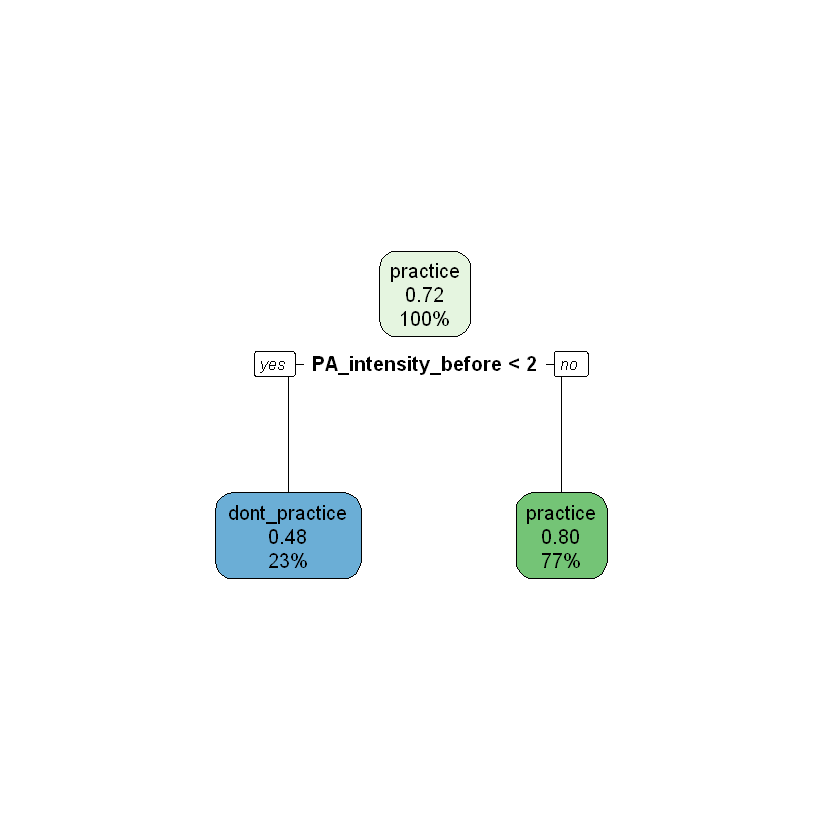

In [7]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



In [9]:
print(model$matrix$overall["Kappa"])

    Kappa 
0.3350013 


CART 

871 samples
 73 predictor
  2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 784, 784, 785, 784, 784, 783, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa     
  0.02057613  0.7085025  0.15479434
  0.02469136  0.7073528  0.16684425
  0.04115226  0.7050272  0.06584984

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02469136.


### Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            76      117
  practice                 27      151
                                          
               Accuracy : 0.6119          
                 95% CI : (0.5602, 0.6617)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2374          
                                          
 Mcnemar's Test P-Value : 1.201e-13       
                                          
            Sensitivity : 0.7379          
            Specificity : 0.5634          
         Pos Pred Value : 0.3938          
         Neg Pred Value : 0.8483          
             Prevalence : 0.2776          
         Detection Rate : 0.2049          
   Detection Prevalence : 0.5202          
      Balanced Accuracy : 0.6506          
                                          
       '

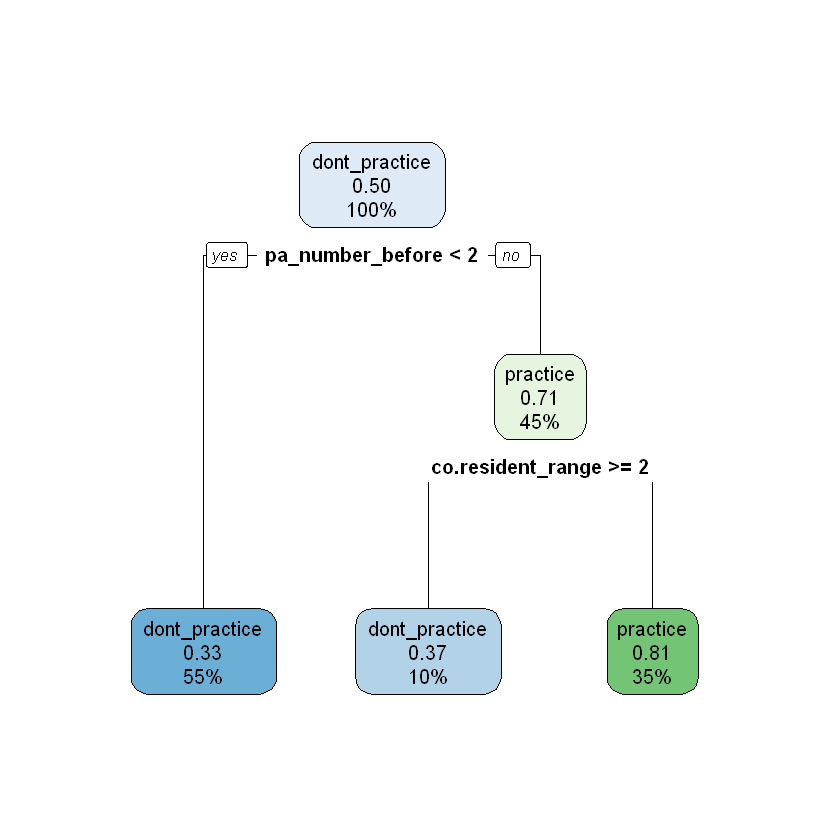

In [11]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

In [12]:
print(model$result)

CART 

1256 samples
  73 predictor
   2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1131, 1131, 1130, 1130, 1130, 1130, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.04617834  0.7109651  0.4222568
  0.05414013  0.6815302  0.3631202
  0.37738854  0.5564444  0.1153971

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.04617834.


### F-beta metric without augmentation

In [13]:
fbeta <- function (data, lev=NULL, model = NULL){
    fb_val <- FBeta_Score(data$obs, data$pred, positive="practice", beta = 0.1)
    c(FB = fb_val)
}

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            35       23
  practice                 68      245
                                          
               Accuracy : 0.7547          
                 95% CI : (0.7077, 0.7977)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.09004         
                                          
                  Kappa : 0.2935          
                                          
 Mcnemar's Test P-Value : 3.979e-06       
                                          
            Sensitivity : 0.33981         
            Specificity : 0.91418         
         Pos Pred Value : 0.60345         
         Neg Pred Value : 0.78275         
             Prevalence : 0.27763         
         Detection Rate : 0.09434         
   Detection Prevalence : 0.15633         
      Balanced Accuracy : 0.62699         
                                          
       '

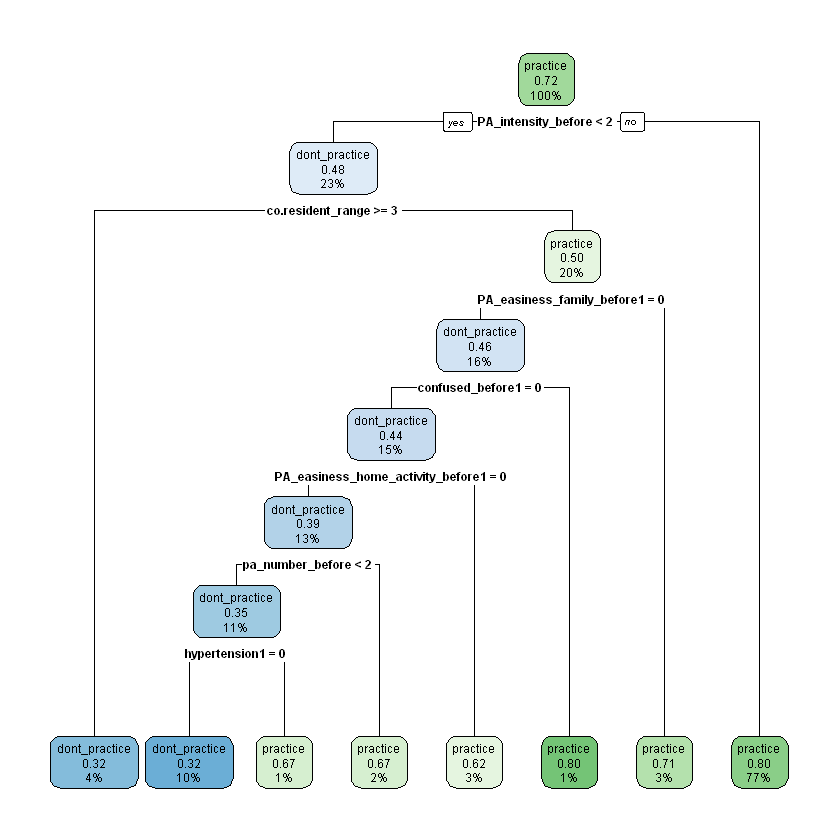

In [14]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "boot", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel)

### F-beta metric with augmentation

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            48       47
  practice                 55      221
                                          
               Accuracy : 0.7251          
                 95% CI : (0.6766, 0.7699)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.4803          
                                          
                  Kappa : 0.2978          
                                          
 Mcnemar's Test P-Value : 0.4882          
                                          
            Sensitivity : 0.4660          
            Specificity : 0.8246          
         Pos Pred Value : 0.5053          
         Neg Pred Value : 0.8007          
             Prevalence : 0.2776          
         Detection Rate : 0.1294          
   Detection Prevalence : 0.2561          
      Balanced Accuracy : 0.6453          
                                          
       '

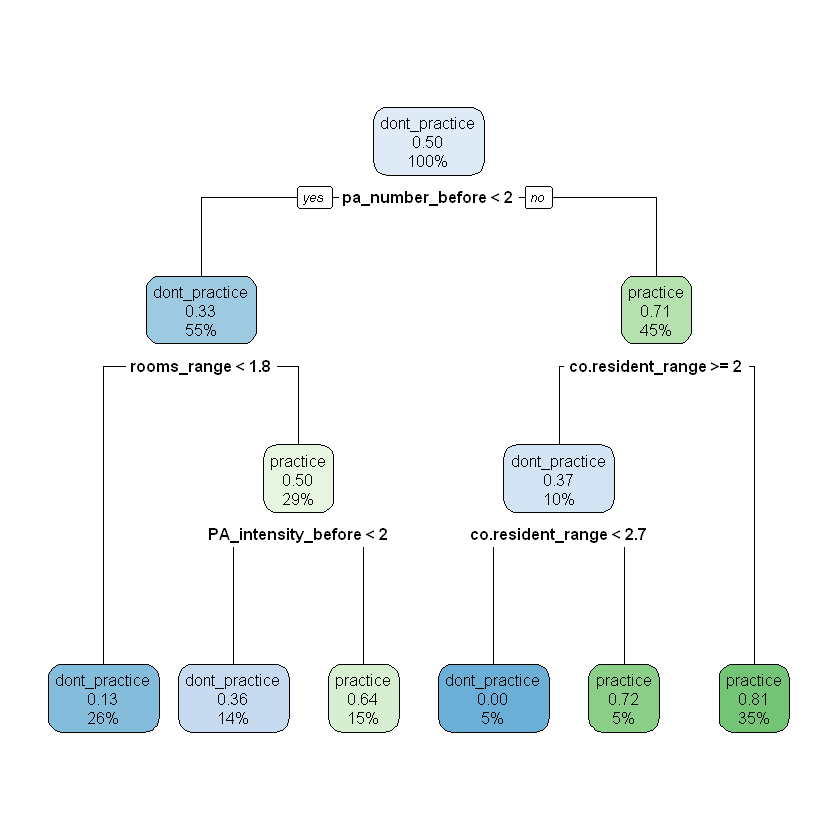

In [15]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "boot", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel)

## Output variable: sedentary time range

### Creating dataset partition

In [16]:
set.seed(2)
lista_treino <- createDataPartition(sedentary_dataset$sedentary_time_range_during, p=0.7, list=FALSE)
treino <- sedentary_dataset[lista_treino,]
teste <- sedentary_dataset[-lista_treino,]

### Kappa metric withou augmentation

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1   0   0   0   0   0
         2   0   0   0   0   0
         3  12  35  43  29  10
         4   1   3  16  15   5
         5   2   6  19  59 116

Overall Statistics
                                          
               Accuracy : 0.469           
                 95% CI : (0.4173, 0.5212)
    No Information Rate : 0.3531          
    P-Value [Acc > NIR] : 2.9e-06         
                                          
                  Kappa : 0.2465          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.00000   0.0000   0.5513  0.14563   0.8855
Specificity           1.00000   1.0000   0.7065  0.90672   0.6417
Pos Pred Value            NaN      NaN   0.3333  0.37500   0.5743
Neg Pred Value        0.95957   0.8814   0.8554  0.73414   0.9112
P

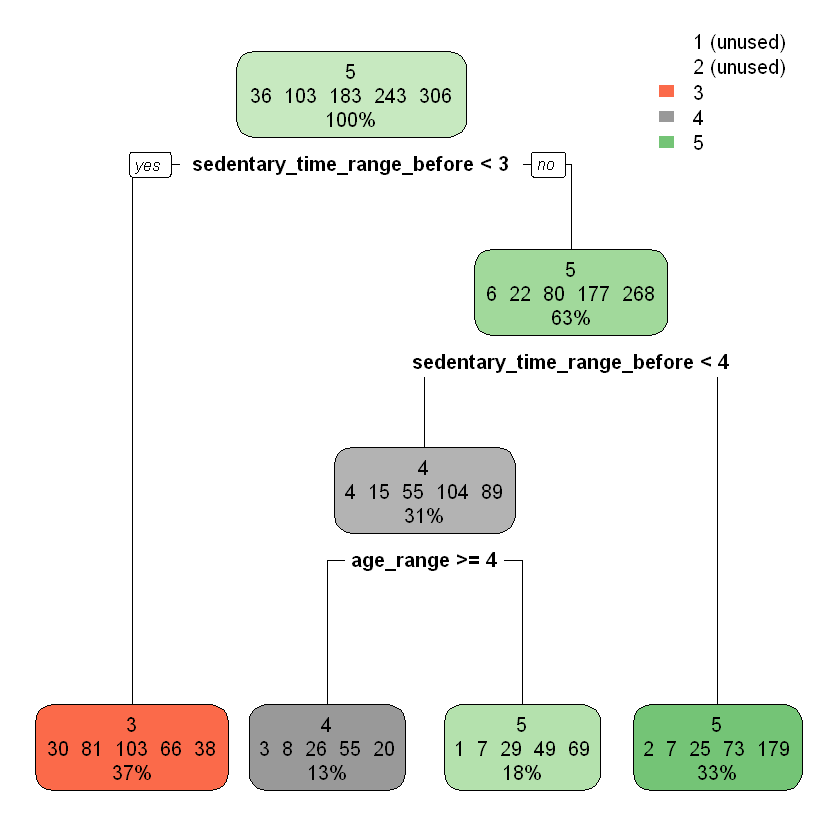

In [17]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



# Decision Trees Separing people with TAG and Depression

## Output variable: sedentary time range during
### People with Tag or Depression

### Creating the dataset partition

In [18]:
sedentary_dataset_disorder <- sedentary_dataset[has_tag_depression, ]
set.seed(2)
lista_treino <- createDataPartition(sedentary_dataset_disorder$sedentary_time_range_during, p=0.7, list=FALSE)
treino <- sedentary_dataset_disorder[lista_treino,]
teste <- sedentary_dataset_disorder[-lista_treino,]


### Kappa metric without augmentation

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5
         1  0  0  0  0  0
         2  0  0  0  0  0
         3  1  0  2  0  3
         4  0  1  2  3  2
         5  0  1  2  9 16

Overall Statistics
                                          
               Accuracy : 0.5             
                 95% CI : (0.3419, 0.6581)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.5612          
                                          
                  Kappa : 0.1552          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.00000  0.00000  0.33333  0.25000   0.7619
Specificity           1.00000  1.00000  0.88889  0.83333   0.4286
Pos Pred Value            NaN      NaN  0.33333  0.37500   0.5714
Neg Pred Value        0.97619  0.95238  0.88889  0.73529   0.6429
Prevalence            0.02381  

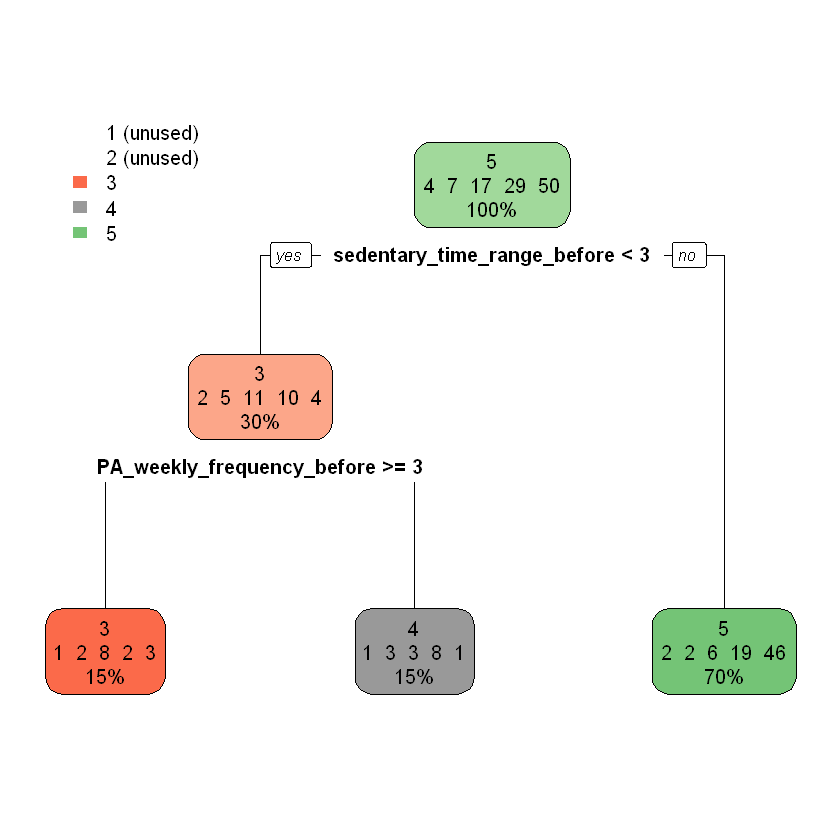

In [19]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



## Output variable: sedentary time range during
### People without Tag or Depression

In [20]:
sedentary_dataset_disorder <- sedentary_dataset[!has_tag_depression, ]

set.seed(2)
lista_treino <- createDataPartition(sedentary_dataset_disorder$sedentary_time_range_during, p=0.7, list=FALSE)
treino <- sedentary_dataset_disorder[lista_treino,]
teste <- sedentary_dataset_disorder[-lista_treino,]


Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5
         1  0  0  0  0  0
         2  0  0  0  0  0
         3 12 32 40 28 17
         4  1  4 20 32 32
         5  0  5 11 31 60

Overall Statistics
                                          
               Accuracy : 0.4062          
                 95% CI : (0.3523, 0.4617)
    No Information Rate : 0.3354          
    P-Value [Acc > NIR] : 0.004523        
                                          
                  Kappa : 0.1822          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity              0.00   0.0000   0.5634  0.35165   0.5505
Specificity              1.00   1.0000   0.6496  0.75641   0.7824
Pos Pred Value            NaN      NaN   0.3101  0.35955   0.5607
Neg Pred Value           0.96   0.8738   0.8418  0.75000   0.7752
Prevalence               0.04  

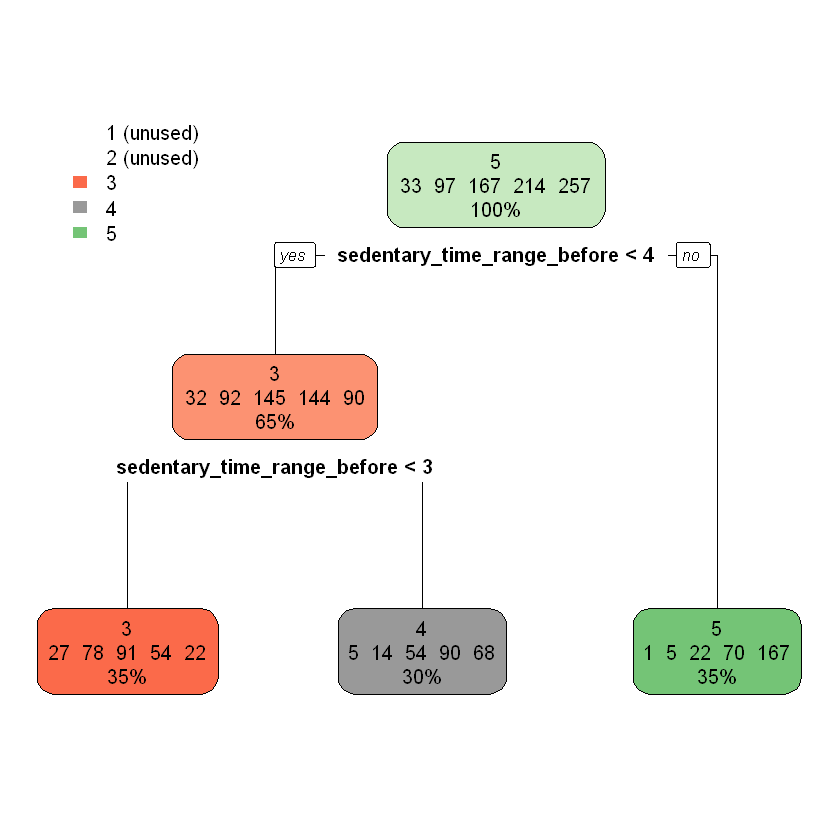

In [21]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)

